In [30]:
import pandas as pd
user_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SQL/customer segmentation.csv')

In [31]:
user_data.head(100)

,CustomerID,purchase_cnt,item_cnt,recency,user_total,user_average,unique_products,average_interval,total_transactions,cancel_frequency,cancel_rate
0,13239,1,363,247,329.56,329.560000,22,0.00,1,0,0.000000
1,13256,1,12540,0,0.00,0.000000,1,0.00,1,0,0.000000
2,17560,5,651,288,854.95,170.990000,22,8.23,5,0,0.000000
3,12444,5,1155,7,5005.46,1001.092000,138,0.85,5,0,0.000000
4,17667,5,1037,197,2055.51,411.102000,85,1.99,5,0,0.000000
5,16560,3,498,344,816.51,272.170000,53,5.89,3,1,0.333333
6,18059,4,258,30,296.71,74.177500,17,2.90,4,1,0.250000
7,12507,4,894,120,1258.06,314.515000,19,7.45,4,1,0.250000
8,12647,13,1420,355,3669.92,282.301538,79,2.68,13,1,0.076923
9,14110,13,2455,22,5669.65,436.126923,94,1.65,13,1,0.076923


# 이상치 처리
이상치 데이터들은 클러스터링 결과를 왜곡할 수 있음

Z-score는 클러스터링 분석의 전처리 과정에서 자주 사용

In [32]:
# 라이브러리 불러오기
import pandas as pd

# 데이터 불러오기
user_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SQL/customer segmentation.csv')

# 데이터의 상위 5번째 행까지 출력
user_data.head()

,CustomerID,purchase_cnt,item_cnt,recency,user_total,user_average,unique_products,average_interval,total_transactions,cancel_frequency,cancel_rate
0,13239,1,363,247,329.56,329.560,22,0.00,1,0,0.0
1,13256,1,12540,0,0.00,0.000,1,0.00,1,0,0.0
2,17560,5,651,288,854.95,170.990,22,8.23,5,0,0.0
3,12444,5,1155,7,5005.46,1001.092,138,0.85,5,0,0.0
4,17667,5,1037,197,2055.51,411.102,85,1.99,5,0,0.0


In [33]:
from scipy import stats
import numpy as np

In [34]:
# CustomerID를 제외하고, 나머지 컬럼 안에 있는 값들을 정규화하여 Z-score를 계산

# Z-score 계산
z_scores = stats.zscore(user_data.iloc[:, 1:], axis=0)

# Z-score 절대값 계산
z_scores = np.abs(z_scores)

# Z-score 출력
z_scores

array([[4.87647632e-01, 3.87457201e-01, 9.83294921e-01, 4.04544293e-01,
        2.84997968e-01, 5.10041833e-01, 9.33650715e-01, 4.87647632e-01,
        5.40144293e-01, 1.28098305e+00],
       [4.87647632e-01, 1.03876245e-01, 1.07568505e+00, 4.09756219e-01,
        5.79253161e-01, 5.66650748e-01, 9.33650715e-01, 4.87647632e-01,
        5.40144293e-01, 1.28098305e+00],
       [4.06089840e-01, 3.80750187e-01, 1.32506892e+00, 3.96235353e-01,
        4.26580824e-01, 5.10041833e-01, 2.53083715e+00, 4.06089840e-01,
        5.40144293e-01, 1.28098305e+00],
       [4.06089840e-01, 3.69012912e-01, 1.01733339e+00, 3.30595853e-01,
        3.14594757e-01, 1.97344968e-01, 5.75836050e-01, 4.06089840e-01,
        5.40144293e-01, 1.28098305e+00],
       [4.06089840e-01, 3.71760924e-01, 5.66497357e-01, 3.77248733e-01,
        2.12191326e-01, 3.40215087e-01, 9.59434418e-02, 4.06089840e-01,
        5.40144293e-01, 1.28098305e+00],
       [4.46868736e-01, 3.84313288e-01, 1.79188220e+00, 3.96843274e-01,
   

In [35]:
# 임계값(threshold) 설정
threshold = 3

# z-score 기준으로 이상치를 찾아서 outlier 컬럼에 이상치 여부 기입 (0: 정상, 1:이상치)
user_data['outlier'] = (z_scores > threshold).any(axis=1).astype(int)
user_data.head()

,CustomerID,purchase_cnt,item_cnt,recency,user_total,user_average,unique_products,average_interval,total_transactions,cancel_frequency,cancel_rate,outlier
0,13239,1,363,247,329.56,329.560,22,0.00,1,0,0.0,0
1,13256,1,12540,0,0.00,0.000,1,0.00,1,0,0.0,0
2,17560,5,651,288,854.95,170.990,22,8.23,5,0,0.0,0
3,12444,5,1155,7,5005.46,1001.092,138,0.85,5,0,0.0,0
4,17667,5,1037,197,2055.51,411.102,85,1.99,5,0,0.0,0


/tmp/ipython-input-36-2453688526.py:6: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



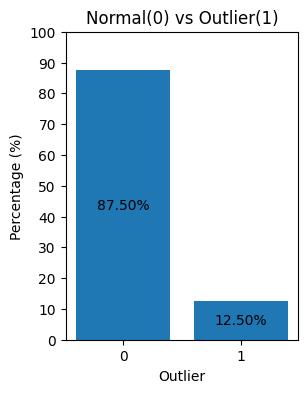

In [36]:
# 시각화에 필요한 라이브러리 불러오기
import matplotlib.pyplot as plt

# user_data['outlier']을 활용하여 이상치 여부에 따른 확률 계산
# value_counts()는 열의 고윳값의 개수를 반환하지만 normalize=True를 사용하면 열에 있는 값의 개수 비율(상대적 빈도)을 반환함
outlier_percentage = pd.value_counts(user_data['outlier'], normalize=True) * 100

# 시각화 자료 크기 조정
plt.figure(figsize=(3,4))

# outlier_percentage라는 데이터로 bar chart 시각화
# x축 값을 0과 1로 지정
bars = plt.bar(['0', '1'], outlier_percentage)

# 퍼센트(%) 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval/2, f'{yval:.2f}%', fontsize=10, va='center', ha='center')

plt.title('Normal(0) vs Outlier(1)') # 표 제목
plt.yticks(ticks=np.arange(0, 101, 10)) # y축 표기 (0~100까지 10단위로 증가)
plt.ylabel('Percentage (%)') # y축 범례
plt.xlabel('Outlier') # x축 범례
plt.show() # 출력

In [37]:
# 정상 데이터만 필터링
user_data = user_data[user_data['outlier'] == 0]

# outlier 컬럼 삭제
user_data = user_data.drop(columns=['outlier'])

# DataFrame의 인덱스를 리셋하고, 이전 인덱스를 컬럼으로 추가하지 않음
user_data.reset_index(inplace=True, drop=True)
user_data.head()

,CustomerID,purchase_cnt,item_cnt,recency,user_total,user_average,unique_products,average_interval,total_transactions,cancel_frequency,cancel_rate
0,13239,1,363,247,329.56,329.560,22,0.00,1,0,0.0
1,13256,1,12540,0,0.00,0.000,1,0.00,1,0,0.0
2,17560,5,651,288,854.95,170.990,22,8.23,5,0,0.0
3,12444,5,1155,7,5005.46,1001.092,138,0.85,5,0,0.0
4,17667,5,1037,197,2055.51,411.102,85,1.99,5,0,0.0


# 변수 간 상관관계 분석
다중공선성이란 두 개 이상의 독립변수가 서로 높은 상관관계를 가지고 있을 때 발생하는 문제

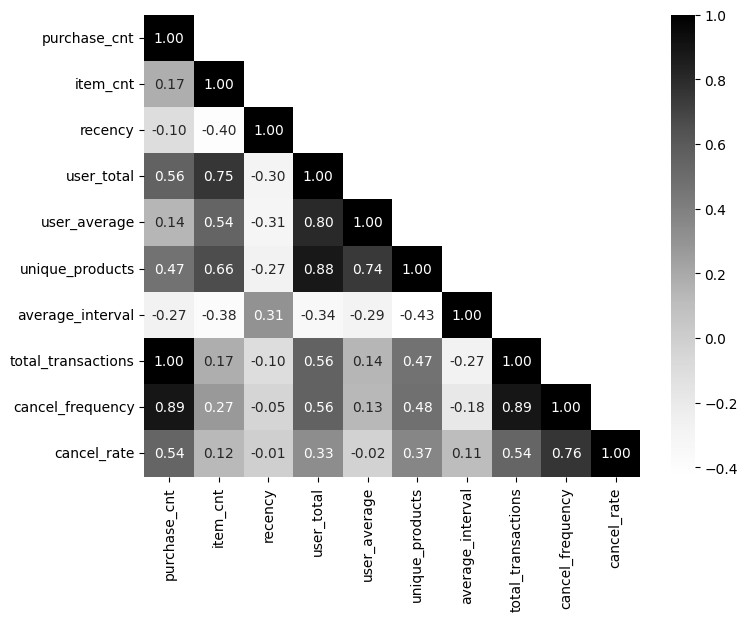

In [38]:
# 상관 계수를 시각화하여 다중공선성 문제가 있는지 확인
# 시각화 라이브러리 불러오기
import seaborn as sns

# 'CustomerID' 열을 제외(drop)하고 상관 관계 행렬 계산(corr())
corr = user_data.drop(columns=['CustomerID']).corr()

# 행렬이 대각선을 기준으로 대칭이기 때문에 하단만 표시하기 위한 마스크 생성
mask = np.zeros_like(corr) # np.zeros_like()는 0으로 가득찬 array 생성, 크기는 corr와 동일
mask[np.triu_indices_from(mask, k=1)] = True # array의 대각선 영역과 그 윗 부분에 True가 들어가도록 설정

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(corr, mask=mask, cmap='Greys', annot=True, fmt='.2f')
plt.show()

높은 상관관계를 가진 변수들을 찾으면 중복되어 제거할 수 있는 특성은 없는지, 또한 다중공선성 문제가 있는 컬럼 쌍이 무엇인지를 알 수 있음

# 피처 스케일링
연속형 데이터만 진행 가능

In [39]:
# Standard Scaler 불러오기
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [40]:
# 원본 데이터에 영향을 주지 않기 위해 복사
data = user_data.copy()

# CustomerID를 제외한 데이터에 스케일링 적용
columns_list = data.iloc[:, 1:].columns # iloc: 데이터 특정 값 추출, columns: 데이터프레임의 열 이름 조회
data[columns_list] = scaler.fit_transform(data[columns_list])

In [41]:
# 스케일링 된 데이터 출력
data.head()

,CustomerID,purchase_cnt,item_cnt,recency,user_total,user_average,unique_products,average_interval,total_transactions,cancel_frequency,cancel_rate
0,13239,-1.226885,-0.526444,0.876319,-0.631766,0.042198,-0.730056,-1.042291,-1.226885,-0.819575,-1.280759
1,13256,-1.226885,2.205750,-1.092268,-0.686945,-1.026710,-0.923307,-1.042291,-1.226885,-0.819575,-1.280759
2,17560,-0.770874,-0.461824,1.203088,-0.543798,-0.472114,-0.730056,2.380455,-0.770874,-0.819575,-1.280759
3,12444,-0.770874,-0.348740,-1.036478,0.151136,2.220271,0.337421,-0.688787,-0.770874,-0.819575,-1.280759
4,17667,-0.770874,-0.375216,0.477820,-0.342784,0.306675,-0.150306,-0.214677,-0.770874,-0.819575,-1.280759


# PCA
목적

1. 다중공선성 식별
2. K-Means 클러스터링을 통한 더 나은 클러스터링
3. 노이즈 감소
4. 시각화 향상
5. 계산 효율성 향상

In [42]:
# PCA 불러오기
from sklearn.decomposition import PCA

# CustomerID를 인덱스로 지정
data.set_index('CustomerID', inplace=True)

# PCA 적용
pca = PCA().fit(data)

In [43]:
# Explained Variance의 누적합 계산
explained_variance_ratio = pca.explained_variance_ratio_ # explained_variance_ratio_: Explained Variance 비율을 계산해 주는 함수
cumulative_explained_variance = np.cumsum(explained_variance_ratio) # cumsum: 각 원소의 누적합을 계산하는 함수

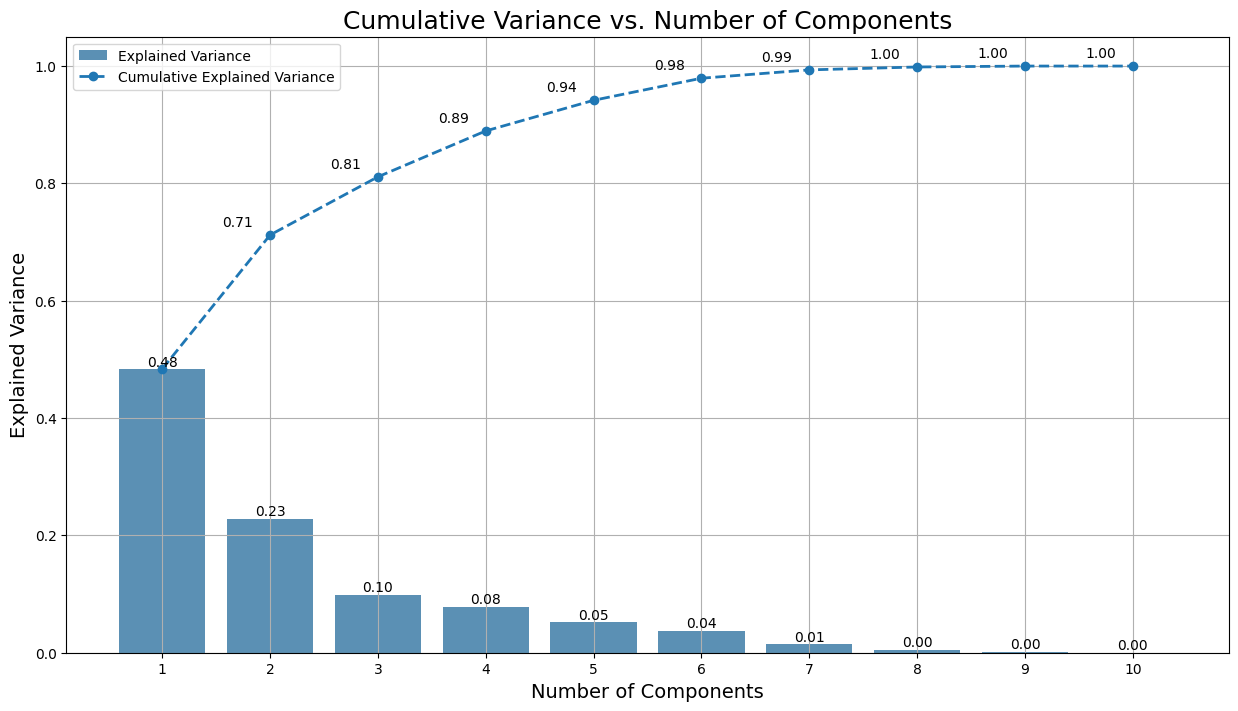

In [44]:
plt.figure(figsize=(15, 8))

# 각 성분의 설명된 분포에 대한 막대 그래프
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)), y=explained_variance_ratio, alpha=0.8)

# 누적 분포에 대한 선 그래프
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance, marker='o', linestyle='--', linewidth=2)

# 레이블과 제목 설정
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# 눈금 및 범례 사용자 정의
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot],
           labels=['Explained Variance', 'Cumulative Explained Variance'])

# 두 그래프의 분산 값 표시
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')
plt.show()

최적의 주성분 수를 선택하기 위해 일반적으로 cumulative explained variance(누적 설명 분산)이 크게 증가하지 않는 지점을 찾습니다. 이를 곡선의 '엘보우 포인트'라고 합니다. 그림에서 볼 수 있듯이 누적 분산의 증가는 5-6번째 주성분 이후에 둔화되기 시작합니다(전체 분산의 약 95%를 설명합니다).

In [45]:
# 6개의 주성분을 유지하는 PCA 선언
pca = PCA(n_components=6)

# 기존 data를 pca에 fit_transform
data_pca = pca.fit_transform(data)

# 압축된 데이터 셋 생성
data_pca = pd.DataFrame(data_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# 인덱스로 빼 두었던 CustomerID 다시 추가
data_pca.index = data.index

In [46]:
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
CustomerID,,,,,,
13239,-2.118571,1.119690,-0.552836,1.272786,0.464272,-0.347258
13256,-1.414928,2.160051,-1.423077,-0.961983,1.693053,1.502889
17560,-2.611360,-0.227683,1.588540,0.339230,-0.824815,1.180398
12444,-0.199658,2.627217,-0.260939,0.314599,-1.317485,-0.948101
17667,-1.436030,1.084192,-0.077893,0.889499,-0.245578,-0.062802


0개의 컬럼으로 구성되었던 데이터가 PC1~6이라는 압축된 6개의 컬럼으로 구성된 것을 확인

# K-Means 클러스터링
각 군집의 평균(mean)을 활용하여 K개의 군집(cluster)으로 묶는 방식으로 학습



In [47]:
from sklearn.cluster import KMeans
from collections import Counter

# k=3개의 클러스터로 K-Means 클러스터링 적용
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(data_pca)

# 각 클러스터의 빈도수 구하기
cluster_frequencies = Counter(kmeans.labels_)

# 빈도수에 기반하여 이전 레이블에서 새 레이블로의 매핑 생성
label_mapping = {label: new_label for new_label, (label, _) in
                 enumerate(cluster_frequencies.most_common())}

# 매핑을 적용하여 새 레이블 얻기
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

# 원래 데이터셋에 새 클러스터 레이블 추가
user_data['cluster'] = new_labels

# PCA 버전의 데이터셋에 새 클러스터 레이블 추가
data_pca['cluster'] = new_labels


In [48]:
# K-Means 분류된 결과 보기
user_data.head()

,CustomerID,purchase_cnt,item_cnt,recency,user_total,user_average,unique_products,average_interval,total_transactions,cancel_frequency,cancel_rate,cluster
0,13239,1,363,247,329.56,329.560,22,0.00,1,0,0.0,0
1,13256,1,12540,0,0.00,0.000,1,0.00,1,0,0.0,0
2,17560,5,651,288,854.95,170.990,22,8.23,5,0,0.0,0
3,12444,5,1155,7,5005.46,1001.092,138,0.85,5,0,0.0,0
4,17667,5,1037,197,2055.51,411.102,85,1.99,5,0,0.0,0


In [49]:
# 각 군집별로 몇 명의 고객이 있는지 확인
user_data.value_counts('cluster')

,count
cluster,
0,13
1,7
2,1


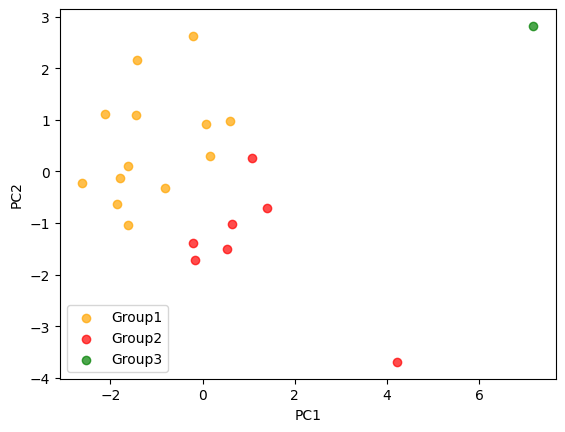

In [50]:
# 각 클러스터 별 데이터 분리
cluster_0 = data_pca[data_pca['cluster'] == 0]
cluster_1 = data_pca[data_pca['cluster'] == 1]
cluster_2 = data_pca[data_pca['cluster'] == 2]

# 클러스터 별 시각화
plt.scatter(cluster_0['PC1'], cluster_0['PC2'], color = 'orange', alpha = 0.7, label = 'Group1')
plt.scatter(cluster_1['PC1'], cluster_1['PC2'], color = 'red', alpha = 0.7, label = 'Group2')
plt.scatter(cluster_2['PC1'], cluster_2['PC2'], color = 'green', alpha = 0.7, label = 'Group3')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [51]:
!pip install plotly==5.18.0

In [52]:
# 색상 지정
colors = ['red', 'blue', 'green']

# 각 클러스터별 데이터 분릴
cluster_0 = data_pca[data_pca['cluster'] == 0]
cluster_1 = data_pca[data_pca['cluster'] == 1]
cluster_2 = data_pca[data_pca['cluster'] == 2]

# 3D Scatter Plot 생성
import plotly.graph_objects as go
fig = go.Figure()

# 각 클러스터별 데이터 표기
fig.add_trace(go.Scatter3d(x=cluster_0['PC1'], y=cluster_0['PC2'], z=cluster_0['PC3'],
                           mode='markers', marker=dict(color=colors[0], size=5, opacity=0.4), name='Group 1'))
fig.add_trace(go.Scatter3d(x=cluster_1['PC1'], y=cluster_1['PC2'], z=cluster_1['PC3'],
                           mode='markers', marker=dict(color=colors[1], size=5, opacity=0.4), name='Group 2'))
fig.add_trace(go.Scatter3d(x=cluster_2['PC1'], y=cluster_2['PC2'], z=cluster_2['PC3'],
                           mode='markers', marker=dict(color=colors[2], size=5, opacity=0.4), name='Group 3'))

# 범례 및 제목 영역 설정
fig.update_layout(
    title=dict(text='3D Visualization of Customer Clusters in PCA Space', x=0.5),
    scene=dict(
        xaxis=dict(backgroundcolor="grey", gridcolor='white', title='PC1'),
        yaxis=dict(backgroundcolor="grey", gridcolor='white', title='PC2'),
        zaxis=dict(backgroundcolor="grey", gridcolor='white', title='PC3'),
    ),
    width=900,
    height=800
)

fig.show()

In [53]:
group1 = user_data[user_data['cluster'] == 0]
group2 = user_data[user_data['cluster'] == 1]
group3 = user_data[user_data['cluster'] == 2]

In [54]:
group1.describe()

,CustomerID,purchase_cnt,item_cnt,recency,user_total,user_average,unique_products,average_interval,total_transactions,cancel_frequency,cancel_rate,cluster
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.00000,13.000000,13.000000,13.000000,13.0
mean,14919.923077,7.000000,2079.615385,158.923077,2349.730000,309.019542,63.307692,2.80000,7.000000,0.769231,0.111810,0.0
std,2139.714913,5.066228,3287.386564,138.348872,2357.757814,254.112308,54.074616,2.73566,5.066228,0.725011,0.120935,0.0
min,12444.000000,1.000000,162.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.0
25%,13239.000000,4.000000,498.000000,22.000000,329.560000,170.990000,19.000000,0.85000,4.000000,0.000000,0.000000,0.0
50%,14110.000000,5.000000,1037.000000,122.000000,1258.060000,282.301538,53.000000,1.99000,5.000000,1.000000,0.076923,0.0
75%,16818.000000,13.000000,2163.000000,288.000000,3669.920000,411.102000,94.000000,3.05000,13.000000,1.000000,0.250000,0.0
max,18059.000000,16.000000,12540.000000,355.000000,7024.530000,1001.092000,172.000000,8.23000,16.000000,2.000000,0.333333,0.0


In [55]:
group2.describe()

,CustomerID,purchase_cnt,item_cnt,recency,user_total,user_average,unique_products,average_interval,total_transactions,cancel_frequency,cancel_rate,cluster
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0
mean,13833.000000,19.285714,1548.428571,113.857143,3949.675714,185.521107,113.428571,2.270000,19.285714,6.857143,0.353446,1.0
std,1437.316481,9.411239,1064.027703,112.572093,3485.383090,108.021765,64.863593,2.057636,9.411239,4.180453,0.088758,0.0
min,12431.000000,12.000000,290.000000,8.000000,573.450000,38.230000,31.000000,0.700000,12.000000,3.000000,0.166667,1.0
25%,12735.500000,15.000000,790.500000,19.500000,1500.705000,116.028500,60.000000,1.140000,15.000000,5.500000,0.345395,1.0
50%,13113.000000,16.000000,1001.000000,50.000000,3365.430000,202.555263,113.000000,1.390000,16.000000,6.000000,0.400000,1.0
75%,15006.000000,18.500000,2554.500000,230.000000,5098.720000,236.544688,166.500000,2.420000,18.500000,6.000000,0.400000,1.0
max,15804.000000,40.000000,2858.000000,240.000000,10510.000000,352.716111,197.000000,6.680000,40.000000,16.000000,0.416667,1.0


In [56]:
group3.describe()

,CustomerID,purchase_cnt,item_cnt,recency,user_total,user_average,unique_products,average_interval,total_transactions,cancel_frequency,cancel_rate,cluster
count,1.0,1.0,1.0,1.0,1.00,1.000000,1.0,1.00,1.0,1.0,1.00000,1.0
mean,13081.0,21.0,19021.0,15.0,27964.48,1331.641905,511.0,0.34,21.0,10.0,0.47619,2.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,13081.0,21.0,19021.0,15.0,27964.48,1331.641905,511.0,0.34,21.0,10.0,0.47619,2.0
25%,13081.0,21.0,19021.0,15.0,27964.48,1331.641905,511.0,0.34,21.0,10.0,0.47619,2.0
50%,13081.0,21.0,19021.0,15.0,27964.48,1331.641905,511.0,0.34,21.0,10.0,0.47619,2.0
75%,13081.0,21.0,19021.0,15.0,27964.48,1331.641905,511.0,0.34,21.0,10.0,0.47619,2.0
max,13081.0,21.0,19021.0,15.0,27964.48,1331.641905,511.0,0.34,21.0,10.0,0.47619,2.0
